<a href="https://colab.research.google.com/github/KaushalKumar-100/Machine_learning_hacthon/blob/main/reinforcement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("/content/NIFTY 100.csv")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [8]:
df.head()

,Date,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
0,2003-01-01,0.0,0.0,0.0,1000.00,NaN,NaN,14.04,2.14,2.73
1,2003-01-02,0.0,0.0,0.0,1008.03,NaN,NaN,14.15,2.16,2.71
2,2003-01-03,0.0,0.0,0.0,1004.49,NaN,NaN,14.10,2.15,2.72
3,2003-01-06,0.0,0.0,0.0,999.85,NaN,NaN,14.04,2.14,2.73
4,2003-01-07,0.0,0.0,0.0,997.81,NaN,NaN,14.01,2.14,2.74


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [13]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Turnover', 'P/E',
       'P/B', 'Div Yield'],
      dtype='object')

In [22]:
df = df.dropna(subset=(['P/E','P/B']))


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [25]:
df = df[['Date', 'Close']]
df = df.dropna(subset=['Close'])
df = df.reset_index(drop=True)

df.head()


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,Date,Close
0,2003-01-01,1000.00
1,2003-01-02,1008.03
2,2003-01-03,1004.49
3,2003-01-06,999.85
4,2003-01-07,997.81


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [26]:
df["Date"]=pd.to_datetime(df["Date"])

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [27]:
print(df.shape)
print(df.isna().sum())
df.tail()


(4308, 2)
Date     0
Close    0
dtype: int64


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,Date,Close
4303,2020-05-04,9454.05
4304,2020-05-05,9358.90
4305,2020-05-06,9428.55
4306,2020-05-07,9351.45
4307,2020-05-08,9408.65


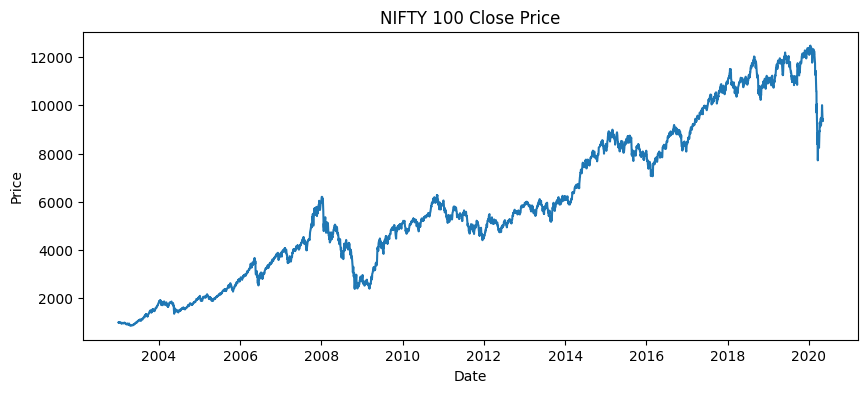

In [28]:


plt.figure(figsize=(10,4))
plt.plot(df['Date'], df['Close'])
plt.title("NIFTY 100 Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


In [29]:
# Action space
HOLD = 0
BUY = 1
SELL = 2


In [30]:
class TradingEnvironment:
    def __init__(self, data, initial_cash=100000):
        self.data = data
        self.initial_cash = initial_cash
        self.reset()

    def reset(self):
        self.current_step = 0
        self.cash = self.initial_cash
        self.shares = 0
        self.total_value = self.initial_cash
        self.history = []
        return self._get_state()

    def _get_state(self):
        price = self.data.loc[self.current_step, 'Close']
        return (price, self.cash, self.shares)

    def step(self, action):
        price = self.data.loc[self.current_step, 'Close']
        prev_value = self.cash + self.shares * price

        # Execute action
        if action == BUY and self.cash >= price:
            self.shares += 1
            self.cash -= price
            self.history.append((self.current_step, 'BUY', price))

        elif action == SELL and self.shares > 0:
            self.shares -= 1
            self.cash += price
            self.history.append((self.current_step, 'SELL', price))

        else:
            self.history.append((self.current_step, 'HOLD', price))

        # Move to next step
        self.current_step += 1
        done = self.current_step >= len(self.data) - 1

        new_price = self.data.loc[self.current_step, 'Close']
        self.total_value = self.cash + self.shares * new_price

        reward = self.total_value - prev_value
        next_state = self._get_state()

        return next_state, reward, done


In [31]:
env = TradingEnvironment(df)

state = env.reset()
print("Initial State:", state)

for i in range(5):
    action = np.random.choice([HOLD, BUY, SELL])
    next_state, reward, done = env.step(action)
    print(f"Step {i} | Action: {action} | Reward: {reward:.2f} | State: {next_state}")


Initial State: (np.float64(1000.0), 100000, 0)
Step 0 | Action: 2 | Reward: 0.00 | State: (np.float64(1008.03), 100000, 0)
Step 1 | Action: 2 | Reward: 0.00 | State: (np.float64(1004.49), 100000, 0)
Step 2 | Action: 0 | Reward: 0.00 | State: (np.float64(999.85), 100000, 0)
Step 3 | Action: 0 | Reward: 0.00 | State: (np.float64(997.81), 100000, 0)
Step 4 | Action: 1 | Reward: 7.50 | State: (np.float64(1005.31), np.float64(99002.19), 1)


In [32]:
def get_discrete_state(prev_price, curr_price, shares):
    if curr_price > prev_price:
        price_state = 1   # UP
    elif curr_price < prev_price:
        price_state = -1  # DOWN
    else:
        price_state = 0   # SAME

    holding_state = 1 if shares > 0 else 0

    return (price_state, holding_state)


In [33]:
actions = [HOLD, BUY, SELL]

Q = {}  # Q-table as dictionary

def get_Q(state):
    if state not in Q:
        Q[state] = np.zeros(len(actions))
    return Q[state]


In [34]:
alpha = 0.1    # learning rate
gamma = 0.95   # discount factor
epsilon = 1.0  # exploration rate
epsilon_decay = 0.995
epsilon_min = 0.01


In [36]:
episodes = 50  # keep small for now

portfolio_values = []

for episode in range(episodes):
    env.reset()
    done = False

    prev_price = env.data.loc[0, 'Close']
    state = get_discrete_state(prev_price, prev_price, env.shares)

    while not done:
        # Choose action (explore or exploit)
        if np.random.rand() < epsilon:
            action = np.random.choice(actions)
        else:
            action = np.argmax(get_Q(state))

        next_state_raw, reward, done = env.step(action)

        curr_price = next_state_raw[0]
        next_state = get_discrete_state(prev_price, curr_price, env.shares)

        # Q-learning update
        # Ensure Q[state] is initialized before update
        _ = get_Q(state)
        best_next = np.max(get_Q(next_state))
        Q[state][action] += alpha * (reward + gamma * best_next - Q[state][action])

        state = next_state
        prev_price = curr_price

    portfolio_values.append(env.total_value)

    epsilon = max(epsilon * epsilon_decay, epsilon_min)

    print(f"Episode {episode+1}/{episodes} | Final Value: {env.total_value:.2f}")

Episode 1/50 | Final Value: 300429.77
Episode 2/50 | Final Value: 166502.66
Episode 3/50 | Final Value: 270300.59
Episode 4/50 | Final Value: 200351.25
Episode 5/50 | Final Value: 115223.33
Episode 6/50 | Final Value: 182458.35
Episode 7/50 | Final Value: 164386.77
Episode 8/50 | Final Value: 219753.61
Episode 9/50 | Final Value: 226199.95
Episode 10/50 | Final Value: 191066.26
Episode 11/50 | Final Value: 262885.17
Episode 12/50 | Final Value: 255475.26
Episode 13/50 | Final Value: 142990.50
Episode 14/50 | Final Value: 197266.58
Episode 15/50 | Final Value: 335496.92
Episode 16/50 | Final Value: 156218.68
Episode 17/50 | Final Value: 174432.34
Episode 18/50 | Final Value: 167348.50
Episode 19/50 | Final Value: 354787.83
Episode 20/50 | Final Value: 285638.21
Episode 21/50 | Final Value: 283887.37
Episode 22/50 | Final Value: 150663.06
Episode 23/50 | Final Value: 195252.78
Episode 24/50 | Final Value: 128807.86
Episode 25/50 | Final Value: 269790.54
Episode 26/50 | Final Value: 29282

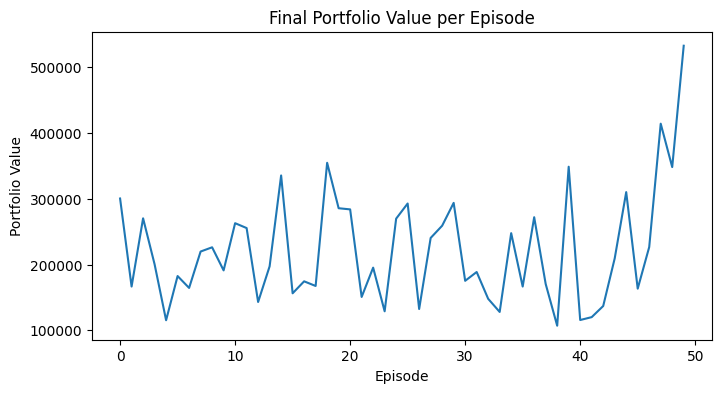

In [37]:
plt.figure(figsize=(8,4))
plt.plot(portfolio_values)
plt.title("Final Portfolio Value per Episode")
plt.xlabel("Episode")
plt.ylabel("Portfolio Value")
plt.show()


In [38]:
env = TradingEnvironment(df)
state = env.reset()

prev_price = env.data.loc[0, 'Close']
state = get_discrete_state(prev_price, prev_price, env.shares)

done = False

while not done:
    action = np.argmax(get_Q(state))  # exploit only
    next_state_raw, reward, done = env.step(action)

    curr_price = next_state_raw[0]
    state = get_discrete_state(prev_price, curr_price, env.shares)
    prev_price = curr_price

final_rl_value = env.total_value
print("Final RL Portfolio Value:", final_rl_value)


Final RL Portfolio Value: 108408.65


In [39]:
initial_cash = 100000
first_price = df.loc[0, 'Close']
shares_bought = initial_cash // first_price
remaining_cash = initial_cash - shares_bought * first_price

final_price = df.loc[len(df)-1, 'Close']
buy_hold_value = shares_bought * final_price + remaining_cash

print("Buy & Hold Portfolio Value:", buy_hold_value)


Buy & Hold Portfolio Value: 940865.0


In [40]:
print("RL Agent Profit:", final_rl_value - initial_cash)
print("Buy & Hold Profit:", buy_hold_value - initial_cash)


RL Agent Profit: 8408.649999999994
Buy & Hold Profit: 840865.0


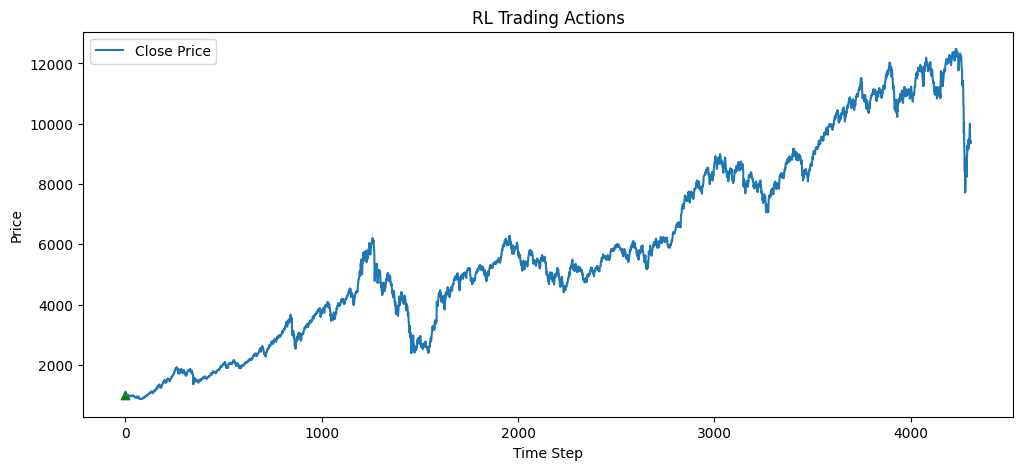

In [41]:
prices = df['Close']

plt.figure(figsize=(12,5))
plt.plot(prices, label='Close Price')

for step, action, price in env.history:
    if action == 'BUY':
        plt.scatter(step, price, color='green', marker='^')
    elif action == 'SELL':
        plt.scatter(step, price, color='red', marker='v')

plt.title("RL Trading Actions")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.legend()
plt.show()


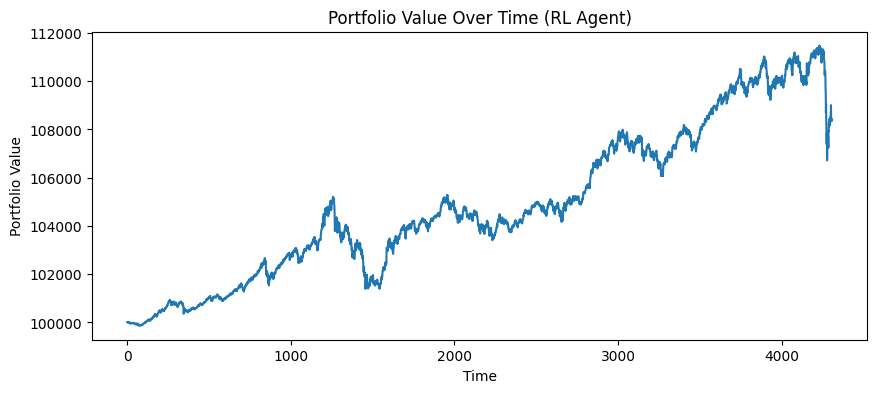

In [42]:
portfolio = []
env = TradingEnvironment(df)
env.reset()

prev_price = env.data.loc[0, 'Close']
state = get_discrete_state(prev_price, prev_price, env.shares)
done = False

while not done:
    action = np.argmax(get_Q(state))
    _, _, done = env.step(action)
    portfolio.append(env.total_value)

    curr_price = env.data.loc[env.current_step, 'Close']
    state = get_discrete_state(prev_price, curr_price, env.shares)
    prev_price = curr_price

plt.figure(figsize=(10,4))
plt.plot(portfolio)
plt.title("Portfolio Value Over Time (RL Agent)")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.show()


In [44]:
import pickle

with open("reinforcement.pkl", "wb") as f:
    pickle.dump(Q, f)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')